In [102]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import math
import sys
from sklearn import preprocessing

In [103]:
# 1. Выбрать задачу (классификация или регрессия), датасет (пересечений не должно быть - у каждого студента свой датасет) и метрику качества

#Классификация, https://www.kaggle.com/vicsuperman/prediction-of-music-genre?select=music_genre.csv

In [104]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [105]:
data = pd.read_csv("/content/gdrive/MyDrive/music_genre.csv")
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [106]:
# 2. Сделать препроцессинг, фичеинжинириг и т.д. \\ разрешается использование любых пакетов

In [107]:
# 2*. Посчитать различные статистики, визуализировать данные и сделать первичные выводы \\ разрешается использование любых пакетов

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [109]:
data = data.drop('instance_id', axis = 1)

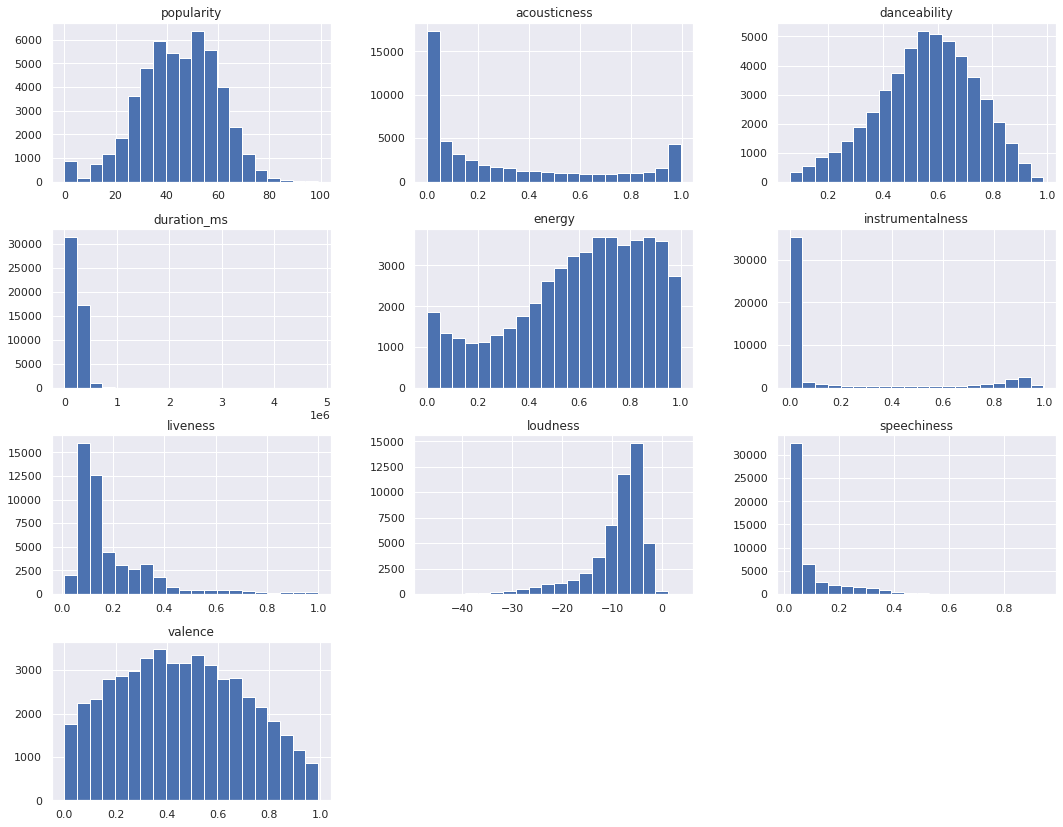

In [110]:
data[data.columns].hist(figsize =  (18,14.3), bins = 20);

In [111]:
data[data['tempo']=='?'] = 0
data['tempo'] = data['tempo'].astype('float64')

In [112]:
num = list(data.dtypes[data.dtypes == "float64"].index)
int_list = list(data.dtypes[data.dtypes == "int64"].index)
num = num + int_list
print(len(num))

11


In [113]:
data = data.fillna(0)

In [114]:
d = pd.unique(data["music_genre"])

In [115]:
k = 1
for i in d:
  data.loc[(data["music_genre"] == i), 'music_genre'] = k
  k += 1
pd.unique(data["music_genre"])

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype=object)

In [116]:
data["music_genre"] = pd.to_numeric(data["music_genre"])
pd.unique(data["music_genre"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [117]:
categorical = list(data.dtypes[data.dtypes == "object"].index)
print(len(categorical))

5


In [118]:
import pandas

In [119]:
y = pandas.get_dummies(data['music_genre'])

In [19]:
data = data.drop('music_genre', axis = 1)

In [18]:
data.join(kl)

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,1,2,3,4,5,6,7,8,9,10,11
0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,1,1,0,0,0,0,0,0,0,0,0,0
1,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,1,1,0,0,0,0,0,0,0,0,0,0
2,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,1,1,0,0,0,0,0,0,0,0,0,0
3,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,1,1,0,0,0,0,0,0,0,0,0,0
4,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.028,4-Apr,0.330,11,0,0,0,0,0,0,0,0,0,0,1
50001,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.043,4-Apr,0.113,11,0,0,0,0,0,0,0,0,0,0,1
50002,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,11,0,0,0,0,0,0,0,0,0,0,1
50003,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.886,4-Apr,0.354,11,0,0,0,0,0,0,0,0,0,0,1


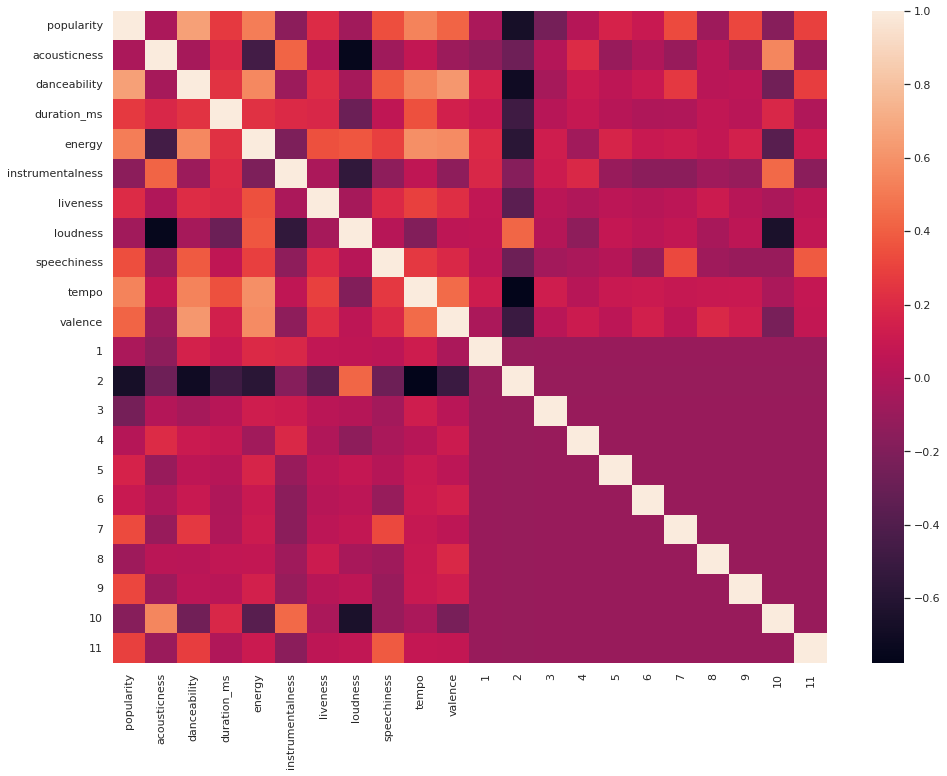

In [20]:
sns.set(rc={'figure.figsize':(16,12)})
sns.heatmap((data[[*num]].join(kl)).corr());

нормальная корреляция видна только у energy и loudness, выкинем energy

In [21]:
data = data.drop('energy',axis = 1)
num.remove('energy')

In [27]:
#Корреляция популярности, оживленности и валентности, темпа с жанрами очень низкая, удалю ее тоже.
data = data.drop('popularity',axis = 1)
num.remove('popularity')
data = data.drop('liveness',axis = 1)
num.remove('liveness')
data = data.drop('valence',axis = 1)
num.remove('valence')
data = data.drop('tempo',axis = 1)
num.remove('tempo')

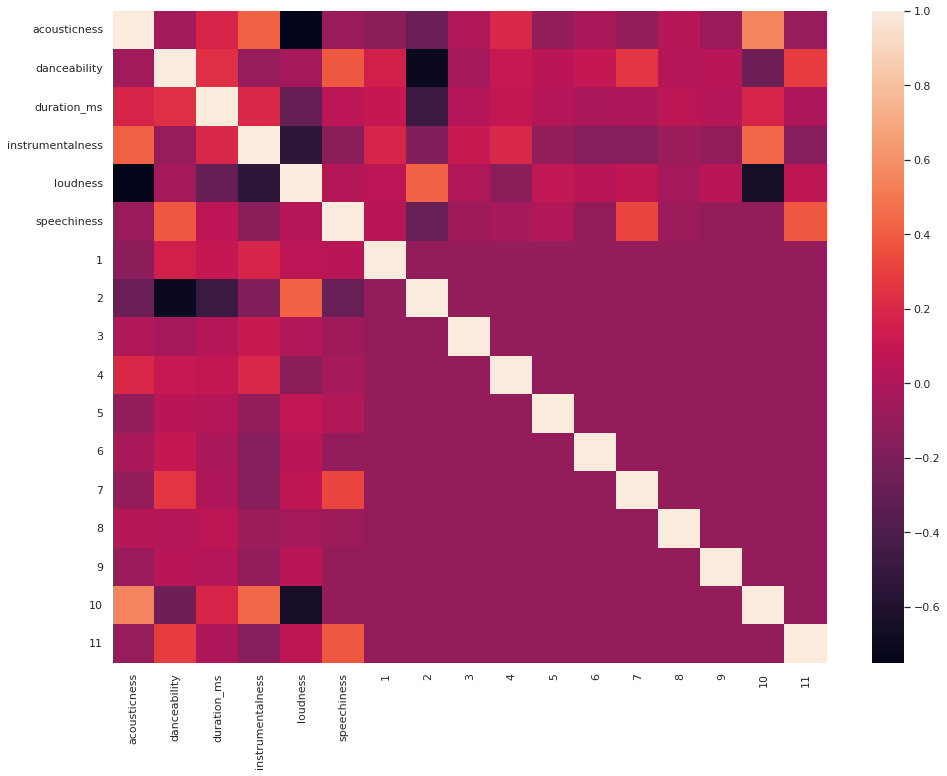

In [28]:
sns.set(rc={'figure.figsize':(16,12)})
sns.heatmap((data[[*num]].join(kl)).corr());

In [30]:
data[[*num]] = preprocessing.normalize(data[[*num]])

In [31]:
def get_one_hot(data):
  for column in categorical:
      tempdf = pd.get_dummies(data[column], prefix=column)
      data = pd.merge(
          left=data,
          right=tempdf,
          left_index=True,
          right_index=True,
      )
  data = data.drop(categorical, axis=1)
  return data

In [32]:
data = data.drop('track_name',axis = 1)
categorical.remove('track_name')

In [33]:
data = data.drop('artist_name',axis = 1)
categorical.remove('artist_name')

In [34]:
data = data.drop('obtained_date',axis = 1)
categorical.remove('obtained_date')

In [35]:
df = get_one_hot(data)

In [36]:
print(data.shape)
print(df.shape)

(50005, 8)
(50005, 22)


In [37]:
df.head()

,acousticness,danceability,duration_ms,instrumentalness,loudness,speechiness,key_0,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_0,mode_Major,mode_Minor
0,8.674347e-04,0.120848,-0.185349,1.467966e-01,-0.964002,1.386413e-02,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5.817869e-08,0.000003,1.000000,4.351949e-06,-0.000032,1.374300e-07,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1.419209e-08,0.000003,1.000000,5.472768e-08,-0.000021,1.600089e-07,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,1.522097e-07,0.000005,1.000000,1.516105e-08,-0.000027,1.432210e-06,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,2.091119e-08,0.000003,1.000000,4.087800e-06,-0.000028,1.857273e-07,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [38]:
categorical

['key', 'mode']

классы сбалансированны

In [121]:
X = df

In [122]:
X

,acousticness,danceability,duration_ms,instrumentalness,loudness,speechiness,key_0,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_0,mode_Major,mode_Minor
0,8.674347e-04,0.120848,-0.185349,1.467966e-01,-0.964002,1.386413e-02,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5.817869e-08,0.000003,1.000000,4.351949e-06,-0.000032,1.374300e-07,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1.419209e-08,0.000003,1.000000,5.472768e-08,-0.000021,1.600089e-07,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,1.522097e-07,0.000005,1.000000,1.516105e-08,-0.000027,1.432210e-06,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,2.091119e-08,0.000003,1.000000,4.087800e-06,-0.000028,1.857273e-07,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,4.666335e-03,0.127556,-0.139711,0.000000e+00,-0.981048,4.163377e-02,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
50001,6.233622e-07,0.000003,1.000000,0.000000e+00,-0.000039,2.183753e-07,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
50002,3.150678e-08,0.000004,1.000000,0.000000e+00,-0.000029,7.705177e-07,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
50003,3.162425e-07,0.000003,1.000000,0.000000e+00,-0.000019,1.678255e-07,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

В задачах многоклассовой классификации используются усредненные метрики бинарной классификации.

In [42]:
# 3. Реализовать метрику качества \\ аргументировать выбор метрики качества 

In [173]:
def compute_tp_tn_fn_fp(y_act, y_pred):
  tp = 0
  tn = 0
  fn = 0
  fp = 0
  num_classes = len(set(y_act))
  for i in range(num_classes):
    for h in range(len(y_act)):
      tp += (y_act[h] == i) & (y_pred[h] == i)
      tn += (y_act[h] != i) & (y_pred[h] != i)
      fn += (y_act[h] == i) & (y_pred[h] != i)
      fp += (y_act[h] != i) & (y_pred[h] == i)
  return tp, tn, fp, fn

In [44]:
def compute_recall(tp, fn):
	'''
	Recall = TP /FN + TP 

	'''
	return (tp  * 100)/ float( tp + fn+ 0.001)

In [45]:
def compute_precision(tp, fp):
	'''
	Precision = TP  / FP + TP 

	'''
	return (tp  * 100)/ float( tp + fp + 0.001)

In [149]:
# F1 = 2 * (precision * recall) / (precision + recall)
def compute_f1_score(y_true, y_pred): #for binary classification
    # calculates the F1 score
    tp, tn, fp, fn = compute_tp_tn_fn_fp(y_true, y_pred)
    precision = compute_precision(tp, fp)/100
    recall = compute_recall(tp, fn)/100
    f1_score = (2*precision*recall)/ (precision + recall + 0.001)
    return f1_score

In [47]:
#f1_score как сренее гармоничество precision и recall отличается свойством: 
#если одно из этих двух значений резко уменьшается, оценка f также уменьшается.
#В данной задаче нет смысла отдавать предпочтение какой-либо из этих двух, лучше учитывать их обе

#precision -  доля истинного позитива во всех положительных прогнозах. 
#Точность 1 означает, что у вас нет ложного срабатывания.

#recall -  доля истинных положительных результатов по всем фактическим положительным элементам. 
#Отзыв 1 означает, что у вас нет ложного отрицания.

In [48]:
# 4. Реализовать и обучить логистическую регрессию или линейную регрессию \\ !!!не разрешается использовать sklearn!!!

In [49]:
# 4*. Добавить регуляризацию \\ не разрешается использовать sklearn

In [64]:
def generate_batches(X, y, batch_size):
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))
    for i in np.arange(len(X)//batch_size):
        ind = perm[i * batch_size : (i + 1) * batch_size]
        yield X[ind], y[ind]

In [157]:
def logit(x, w, b):
    return x @ w + b

def softmax(a):
  a = np.array(a)
  return np.exp(a-max(a)) / np.sum(np.exp(a-max(a)))

def softmax_grad(s): #сумма по одному из измерений
    jacobian_m = np.diag(s)
    print(s.shape)
    for i in range(len(jacobian_m)):
        for j in range(len(jacobian_m)):
            print(s[i], s[i].dtype)
            if i == j:
                jacobian_m[i][j] = s[i] * (1-s[i])
            else: 
                jacobian_m[i][j] = -s[i]*s[j]
    return jacobian_m.sum(axis = 1)

class LogisticRegression(object):
    def __init__(self, l1_coef, l2_coef):
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
        self.w = None
        self.b = None
        self.num_classes = None
    
    def fit(self, X, y, epochs=500, lr=1e-7, batch_size=64, flag = False):
        n, k = X.shape     
        self.num_classes = 11
        self.b = np.random.random(self.num_classes)
        if self.w is None:
            np.random.seed(10)
            self.w = np.random.random((X.shape[1], self.num_classes))
        losses = []
        for i in range(epochs):
            l = []
            for X_batch, y_batch in generate_batches(X_train, y, batch_size):
                predictions = self.predict(X_batch)
                l.append(self.__loss(y_batch, predictions))
                self.w -= lr * self.get_grad(X_batch, y_batch, predictions)
                self.b -= lr * np.sum(predictions-y_batch)/len(y_batch) #свой градиент
            losses.append(np.sum(l) / len(l))
            if flag:
              break
        return losses
    
    def get_grad(self, X_batch, y_batch, predictions):
        logs = logit(X_batch, self.w, self.b)
        soft = []
        for log, yy in zip(logs, y_batch):
          soft.append(softmax(log) - yy)
          #print(s.shape, yy.shape)
        grad_basic = np.dot(X_batch.T, np.array(soft))

        wc = np.copy(self.w)
        grad_l2 = self.l2_coef * wc * 2
        grad_l1 = self.l1_coef * np.sign(wc)
        res = grad_basic + grad_l1 + grad_l2
        return res
        
    def predict(self, X):
        logs = logit(X, self.w, self.b)
        answer = []
        for one in range(len(logs)):
          answer.append(softmax(logs[one]))
        return answer
    
    def predict_test(self, X):
      logs = logit(X, self.w, self.b)
      answer = []
      for log in logs.values:
        answer.append(np.argmax(softmax(log))+1)
      return answer
 
    def __loss(self, y, p): #logloss
        p = np.clip(p, 1e-10, 1 - 1e-10)
        return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))/len(y)


In [158]:
my_model = LogisticRegression(0.2, 0)

In [159]:
loss = my_model.fit(X_train, y_train)

In [127]:
# 5*. Сделать график ошибки модели на обучающей и тестовой выборках 
# 5*. Сделать график точности модели на обучающей и тестовой выборках

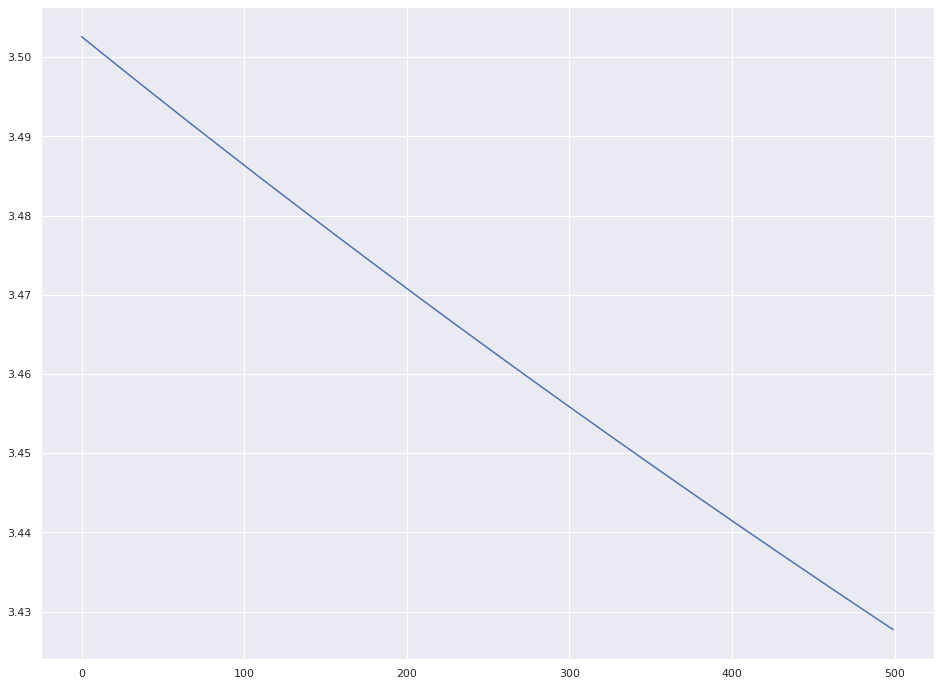

In [160]:
plt.plot(loss)

In [161]:
# 5. Оценить качество модели на обучающей и тестовой выборках \\ не разрешается использовать sklearn

In [176]:
pred = my_model.predict_test(X_test)

In [144]:
yy_test = []
for i in range(len(y_test.values)):
  yy_test.append(np.argmax(y_test.values[i]))

In [163]:
f1_score(yy_test, pred, average= 'micro')

0.08078922810291961

In [177]:
compute_f1_score(yy_test, pred)

0.08485960252449551

In [166]:
pred = my_model.predict_test(X_train)

In [164]:
yy_train = []
for i in range(len(y_train.values)):
  yy_train.append(np.argmax(y_train.values[i]))

In [170]:
f1_score(yy_train, pred, average= 'micro')

0.08376424877867611

In [175]:
compute_f1_score(yy_train, pred)

0.08815015507891422

In [49]:
# 6. Обучить логистическую регрессию или линейную регрессию из sklearn, оценить качество модели на обучающей и тестовой выборках и сравнить со своей моделью

In [185]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [193]:
lr = sklearn.linear_model.LogisticRegression(penalty = 'l1', solver = 'liblinear', max_iter=500)
lr.fit(X_train, yy_train)

LogisticRegression(max_iter=500, penalty='l1', solver='liblinear')

In [194]:
print('test', compute_f1_score(yy_test, lr.predict(X_test)))
print('train', compute_f1_score(yy_train, lr.predict(X_train)))

test 0.2508674603026624
train 0.2552219066200528


In [ ]:
#как видно, библиотечная тоже плохо обучилась

In [ ]:
# 6*. Сделать график ошибки модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью
# 6*. Сделать график точности модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью